In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
from pandas import read_csv

In [2]:
data= pd.read_csv('CouponRecommendation.csv') # IMPORTATION DATA 

In [3]:
# data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [60]:
data.shape

(12684, 26)

In [4]:
data.shape # TAILLE DE DATAFRAME

(12684, 26)

In [5]:
data.info() #TYPE DE CHAQUE COLONNE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
 data.describe()#description de chaque colonne numérique

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
missing_count = data.isnull().sum()
missing_percentage = (missing_count / len(data)) * 100
missing_data_info = pd.DataFrame({
    'Nom de la colonne': data.columns,
    'Nombre de valeurs manquantes': missing_count,
    'Pourcentage de valeurs manquantes': missing_percentage
})
missing_data_info
#valeurs nulles pour chaque colonne + pourcentage

,Nom de la colonne,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
destination,destination,0,0.000000
passanger,passanger,0,0.000000
weather,weather,0,0.000000
temperature,temperature,0,0.000000
time,time,0,0.000000
coupon,coupon,0,0.000000
expiration,expiration,0,0.000000
gender,gender,0,0.000000
age,age,0,0.000000
maritalStatus,maritalStatus,0,0.000000


In [8]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")

Valeurs uniques pour la colonne destination: ['No Urgent Place' 'Home' 'Work']
Valeurs uniques pour la colonne passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Valeurs uniques pour la colonne weather: ['Sunny' 'Rainy' 'Snowy']
Valeurs uniques pour la colonne temperature: [55 80 30]
Valeurs uniques pour la colonne time: ['2PM' '10AM' '6PM' '7AM' '10PM']
Valeurs uniques pour la colonne coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
Valeurs uniques pour la colonne expiration: ['1d' '2h']
Valeurs uniques pour la colonne gender: ['Female' 'Male']
Valeurs uniques pour la colonne age: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Valeurs uniques pour la colonne maritalStatus: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Valeurs uniques pour la colonne has_children: [1 0]
Valeurs uniques pour la colonne education: ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate d

In [9]:
# Supprimer la colonne car ( 99% des valeurs sont manquantes ) 
data = data.drop('car', axis=1)

In [10]:
# Supprimer la colonne toCoupon_GEQ5min ( toCoupon_GEQ5min prend la meme valeurs pour tout les lignes 1  ) 
data = data.drop('toCoupon_GEQ5min', axis=1)

In [11]:
data.shape 
# taille apres supprussion du colonne car et toCoupon_GEQ5min

(12684, 24)

In [12]:
# remplacer les valeurs manquants par la valeur la plus frequente (most frequent value)
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [13]:
#Valeurs uniques pour la colonne passanger: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [14]:
#data_encoded
data_encoded = pd.get_dummies(data, columns=['destination'], prefix='dest')
data_encoded = pd.get_dummies(data_encoded, columns=['passanger'], prefix='passan')
data_encoded = pd.get_dummies(data_encoded, columns=['coupon'], prefix='coupon')
data_encoded= pd.get_dummies(data_encoded,columns=['weather'], prefix='weather')
data_encoded
# 


,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,...,passan_Kid(s),passan_Partner,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),weather_Rainy,weather_Snowy,weather_Sunny
0,55,2PM,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,...,0,0,0,0,0,0,1,0,0,1
1,80,10AM,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,...,0,0,0,0,1,0,0,0,0,1
2,80,10AM,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,...,0,0,0,1,0,0,0,0,0,1
3,80,2PM,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,...,0,0,0,0,1,0,0,0,0,1
4,80,2PM,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,6PM,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,...,0,1,0,1,0,0,0,1,0,0
12680,55,7AM,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,...,0,0,0,1,0,0,0,1,0,0
12681,30,7AM,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,...,0,0,0,0,1,0,0,0,1,0
12682,30,7AM,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,...,0,0,1,0,0,0,0,0,1,0


In [15]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder = OrdinalEncoder(categories=[['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999' ,'$75000 - $87499',
'$87500 - $99999','$100000 or More']])
data_encoded.income = encoder.fit_transform(data_encoded.income.values.reshape(-1, 1))
encoder1=OrdinalEncoder()
encoder1=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.Bar= encoder1.fit_transform(data_encoded.Bar.values.reshape(-1, 1))
encoder2=OrdinalEncoder()
encoder2=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.CoffeeHouse= encoder1.fit_transform(data_encoded.CoffeeHouse.values.reshape(-1, 1))
encoder3=OrdinalEncoder()
encoder3=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.CarryAway= encoder1.fit_transform(data_encoded.CarryAway.values.reshape(-1, 1))
data_encoded.CarryAway
encoder4=OrdinalEncoder()
encoder4=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.RestaurantLessThan20= encoder1.fit_transform(data_encoded.RestaurantLessThan20.values.reshape(-1, 1))
encoder5=OrdinalEncoder()
encoder5=OrdinalEncoder(categories=[['never','less1','1~3','4~8','gt8']])
data_encoded.Restaurant20To50= encoder1.fit_transform(data_encoded.Restaurant20To50.values.reshape(-1, 1))
encoder6=OrdinalEncoder()
encoder6=OrdinalEncoder(categories=[['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']])
data_encoded.education= encoder6.fit_transform(data_encoded.education.values.reshape(-1, 1))
occupation_dict = {'Healthcare Support':'High_Acceptance','Construction & Extraction':'High_Acceptance','Healthcare Practitioners & Technical':'High_Acceptance',
                    'Protective Service':'High_Acceptance','Architecture & Engineering':'High_Acceptance','Production Occupations':'Medium_High_Acceptance',
                     'Student':'Medium_High_Acceptance','Office & Administrative Support':'Medium_High_Acceptance','Transportation & Material Moving':'Medium_High_Acceptance',
                     'Building & Grounds Cleaning & Maintenance':'Medium_High_Acceptance','Management':'Medium_Acceptance','Food Preparation & Serving Related':'Medium_Acceptance',
                    'Life Physical Social Science':'Medium_Acceptance','Business & Financial':'Medium_Acceptance','Computer & Mathematical':'Medium_Acceptance',
                     'Sales & Related':'Medium_Low_Acceptance','Personal Care & Service':'Medium_Low_Acceptance','Unemployed':'Medium_Low_Acceptance',
                    'Farming Fishing & Forestry':'Medium_Low_Acceptance','Installation Maintenance & Repair':'Medium_Low_Acceptance','Education&Training&Library':'Low_Acceptance',
                   'Arts Design Entertainment Sports & Media':'Low_Acceptance','Community & Social Services':'Low_Acceptance','Legal':'Low_Acceptance','Retired':'Low_Acceptance'}
data_encoded['occupation'] = data_encoded['occupation'].map(occupation_dict)

encoder7 = OrdinalEncoder()
encoder7 = OrdinalEncoder(categories=[ ['Low_Acceptance','Medium_Low_Acceptance','Medium_Acceptance','Medium_High_Acceptance','High_Acceptance']])
data_encoded.occupation = encoder7.fit_transform(data_encoded.occupation.values.reshape(-1, 1))
data_encoded.info()



 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature                   12684 non-null  int64  
 1   time                          12684 non-null  object 
 2   expiration                    12684 non-null  object 
 3   gender                        12684 non-null  object 
 4   age                           12684 non-null  object 
 5   maritalStatus                 12684 non-null  object 
 6   has_children                  12684 non-null  int64  
 7   education                     12684 non-null  float64
 8   occupation                    12684 non-null  float64
 9   income                        12684 non-null  float64
 10  Bar                           12684 non-null  float64
 11  CoffeeHouse                   12684 non-null  float64
 12  CarryAway                     12684 non-null  float64
 13  R

In [16]:
# Créer un dictionnaire de correspondance catégorie -> entier
category_mapping_time = {
    '2PM': 14,
     '10AM': 10,
     '6PM': 18,
     '7AM': 7,
    '10PM': 22
 }

category_mapping_expiration = {
    '1d': 24,
    '2h': 2
 }
    
category_mapping_gender = {
     'Female': 0,
     'Male': 1
 }
category_mapping_age = {
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
     '36': 36,
   '41': 41,
   '46': 46,
    '50plus': 50
}

category_mapping_marital = {
 'Unmarried partner':0,
      'Single':1,
      'Married partner':2,
      'Divorced': 3,
      'Widowed': 4
 }


data_encoded['time'] = data_encoded['time'].map(category_mapping_time)
data_encoded['expiration'] = data_encoded['expiration'].map(category_mapping_expiration)
data_encoded['gender'] = data_encoded['gender'].map(category_mapping_gender)
data_encoded['age'] = data_encoded['age'].map(category_mapping_age)
data_encoded['maritalStatus']=data_encoded['maritalStatus'].map(category_mapping_marital)

# Effectuer l'encodage numérique de la colonne "destination"
data_encoded.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   temperature                   12684 non-null  int64  
 1   time                          12684 non-null  int64  
 2   expiration                    12684 non-null  int64  
 3   gender                        12684 non-null  int64  
 4   age                           12684 non-null  int64  
 5   maritalStatus                 12684 non-null  int64  
 6   has_children                  12684 non-null  int64  
 7   education                     12684 non-null  float64
 8   occupation                    12684 non-null  float64
 9   income                        12684 non-null  float64
 10  Bar                           12684 non-null  float64
 11  CoffeeHouse                   12684 non-null  float64
 12  CarryAway                     12684 non-null  float64
 13  R

In [17]:
data_encoded

,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,...,passan_Kid(s),passan_Partner,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),weather_Rainy,weather_Snowy,weather_Sunny
0,55,14,24,0,21,0,1,2.0,1.0,3.0,...,0,0,0,0,0,0,1,0,0,1
1,80,10,2,0,21,0,1,2.0,1.0,3.0,...,0,0,0,0,1,0,0,0,0,1
2,80,10,2,0,21,0,1,2.0,1.0,3.0,...,0,0,0,1,0,0,0,0,0,1
3,80,14,2,0,21,0,1,2.0,1.0,3.0,...,0,0,0,0,1,0,0,0,0,1
4,80,14,24,0,21,0,1,2.0,1.0,3.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,18,24,1,26,1,0,4.0,1.0,6.0,...,0,1,0,1,0,0,0,1,0,0
12680,55,7,24,1,26,1,0,4.0,1.0,6.0,...,0,0,0,1,0,0,0,1,0,0
12681,30,7,24,1,26,1,0,4.0,1.0,6.0,...,0,0,0,0,1,0,0,0,1,0
12682,30,7,24,1,26,1,0,4.0,1.0,6.0,...,0,0,1,0,0,0,0,0,1,0


In [18]:
# Comptez le nombre de personnes ayant accepté le coupon (Y = 1)
nombre_accepte = data[data['Y'] == 1]['Y'].count()

# Calculez le pourcentage
nombre_total = len(data)  # Nombre total de personnes dans l'ensemble de données
pourcentage_accepte = (nombre_accepte / nombre_total) * 100

# Affichez le résultat
print("Pourcentage de personnes ayant accepté le coupon :", pourcentage_accepte, "%")


Pourcentage de personnes ayant accepté le coupon : 56.84326710816777 %


In [19]:
counts = data['maritalStatus'].value_counts()
print("Pourcentage de chaque type de maritalStatus :")
print(counts)


Pourcentage de chaque type de maritalStatus :
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64


In [21]:
counts = data['toCoupon_GEQ5min'].value_counts()
print("Pourcentage de chaque type de maritalStatus :")
print(counts)


KeyError: 'toCoupon_GEQ5min'

In [22]:
counts = data['income'].value_counts()
print("Pourcentage de chaque type de maritalStatus :")
print(counts)

Pourcentage de chaque type de maritalStatus :
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64


In [23]:
# Utilisez crosstab pour compter les occurrences de votre variable par rapport à l'acceptation ou le refus du coupon
tableau_croise = pd.crosstab(index=data['destination'], columns=data['Y'], normalize='index') * 100

# Affichez le tableau croisé
print(tableau_croise)


Y                        0          1
destination                          
Home             49.366698  50.633302
No Urgent Place  36.622633  63.377367
Work             49.778761  50.221239


In [24]:
# Utilisez crosstab pour compter les occurrences de votre variable par rapport à l'acceptation ou le refus du coupon
tableau_croise = pd.crosstab(index=data['passanger'], columns=data['Y'], normalize='index') * 100

# Affichez le tableau croisé
print(tableau_croise)

Y                  0          1
passanger                      
Alone      47.419576  52.580424
Friend(s)  32.656155  67.343845
Kid(s)     49.502982  50.497018
Partner    40.465116  59.534884


In [25]:
# Utilisez crosstab pour compter les occurrences de votre variable par rapport à l'acceptation ou le refus du coupon
tableau_croise = pd.crosstab(index=data['weather'], columns=data['Y'], normalize='index') * 100

# Affichez le tableau croisé
print(tableau_croise)

Y                0          1
weather                      
Rainy    53.719008  46.280992
Snowy    52.953737  47.046263
Sunny    40.520409  59.479591


In [26]:
data = data.drop_duplicates()

In [27]:
print('Is there any missing value present or not?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]


Is there any missing value present or not? False


,missing_count,missing_percentage


In [28]:
# Supprimer la colonne car
data = data.drop('car', axis=1)


KeyError: "['car'] not found in axis"

In [29]:
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])


C:\Users\chino\AppData\Local\Temp\ipykernel_9828\4222842009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
C:\Users\chino\AppData\Local\Temp\ipykernel_9828\4222842009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
C:\Users\chino\AppData\Local\Temp\ipykernel_9828\4222842009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [30]:
donnée.corr()

NameError: name 'donnée' is not defined

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_encoded.temperature=scaler.fit_transform(data_encoded.temperature.values.reshape(-1, 1)) 
scaler1 = StandardScaler()
data_encoded.time=scaler1.fit_transform(data_encoded.time.values.reshape(-1, 1)) 
scaler2 = StandardScaler()
data_encoded.expiration=scaler2.fit_transform(data_encoded.expiration.values.reshape(-1, 1)) 
scaler3 = StandardScaler()
data_encoded.age=scaler3.fit_transform(data_encoded.age.values.reshape(-1, 1)) 
scaler4 = StandardScaler()
data_encoded.education=scaler4.fit_transform(data_encoded.education.values.reshape(-1, 1)) 
scaler5 = StandardScaler()
data_encoded.occupation=scaler5.fit_transform(data_encoded.occupation.values.reshape(-1, 1)) 
scaler6 = StandardScaler()
data_encoded.income=scaler6.fit_transform(data_encoded.income.values.reshape(-1, 1)) 
scaler7 = StandardScaler()
data_encoded.Bar=scaler7.fit_transform(data_encoded.Bar.values.reshape(-1, 1)) 
scaler8 = StandardScaler()
data_encoded.CoffeeHouse=scaler8.fit_transform(data_encoded.CoffeeHouse.values.reshape(-1, 1)) 
scaler9 = StandardScaler()
data_encoded.CarryAway=scaler9.fit_transform(data_encoded.CarryAway.values.reshape(-1, 1)) 
scaler10 = StandardScaler()
data_encoded.RestaurantLessThan20=scaler10.fit_transform(data_encoded.RestaurantLessThan20.values.reshape(-1, 1)) 
scaler11 = StandardScaler()
data_encoded.Restaurant20To50=scaler11.fit_transform(data_encoded.Restaurant20To50.values.reshape(-1, 1)) 
data_encoded

,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,...,passan_Kid(s),passan_Partner,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),weather_Rainy,weather_Snowy,weather_Sunny
0,-0.433430,0.033233,0.888114,0,-1.108935,0,1,-0.891030,-0.575109,-0.290433,...,0,0,0,0,0,0,1,0,0,1
1,0.871799,-0.706285,-1.125982,0,-1.108935,0,1,-0.891030,-0.575109,-0.290433,...,0,0,0,0,1,0,0,0,0,1
2,0.871799,-0.706285,-1.125982,0,-1.108935,0,1,-0.891030,-0.575109,-0.290433,...,0,0,0,1,0,0,0,0,0,1
3,0.871799,0.033233,-1.125982,0,-1.108935,0,1,-0.891030,-0.575109,-0.290433,...,0,0,0,0,1,0,0,0,0,1
4,0.871799,0.033233,0.888114,0,-1.108935,0,1,-0.891030,-0.575109,-0.290433,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,-0.433430,0.772750,0.888114,1,-0.618104,1,0,0.689866,-0.575109,0.887645,...,0,1,0,1,0,0,0,1,0,0
12680,-0.433430,-1.260923,0.888114,1,-0.618104,1,0,0.689866,-0.575109,0.887645,...,0,0,0,1,0,0,0,1,0,0
12681,-1.738659,-1.260923,0.888114,1,-0.618104,1,0,0.689866,-0.575109,0.887645,...,0,0,0,0,1,0,0,0,1,0
12682,-1.738659,-1.260923,0.888114,1,-0.618104,1,0,0.689866,-0.575109,0.887645,...,0,0,1,0,0,0,0,0,1,0


In [32]:
correlation_matrix=data.corr()
correlation_matrix

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ15min,-0.157089,0.079434,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,-0.082693,-0.108139,0.014932,-0.014932,1.000000


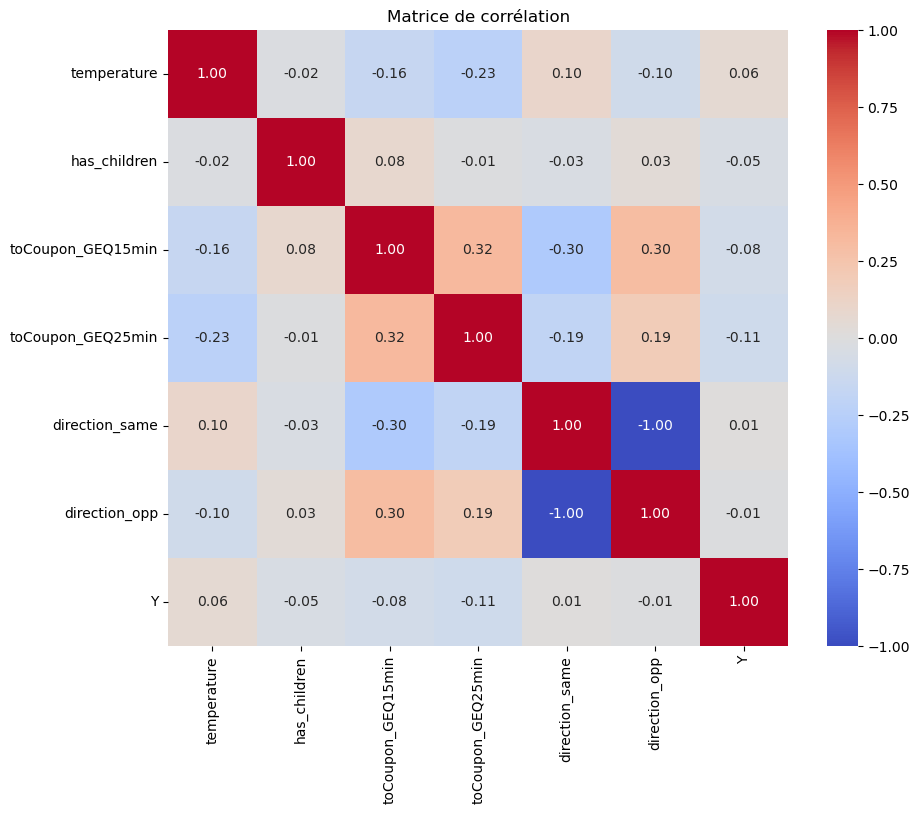

In [33]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# partie PCA


In [34]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chargez vos données (par exemple, data)
# Assurez-vous que vos données sont dans un format approprié (par exemple, un tableau NumPy ou un DataFrame Pandas).


In [61]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargez vos données (par exemple, data) en utilisant Pandas
# Assurez-vous que vos données sont dans un format approprié (par exemple, un DataFrame Pandas).

# Convertir les données du DataFrame en un tableau NumPy avec des types de données numériques
data_array = data.select_dtypes(include=[np.number]).values

# create the PCA instance
# Check for NaN and infinite values in the standardized data
is_nan = np.isnan(data_array)
is_inf = np.isinf(data_array)

# Replace NaN and infinite values with zeros
data_array[is_nan] = 0
data_array[is_inf] = 0

# Create the PCA instance and fit it on the cleaned data
pca = PCA(n_components=None)
reduced_data = pca.fit(data_array)


In [63]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume that you've already performed PCA and have the results
# in reduced_values, reduced_vectors, reduced_eigenvalues, and reduced_variance_ratio.

# Access and use the results in your project as needed.

# Example: Print reduced_values
print("Reduced Values:")
print(reduced_values)

# Example: Access and use the first reduced vector
first_reduced_vector = reduced_vectors[0]
print("First Reduced Vector:")
print(first_reduced_vector)

# Example: Print reduced eigenvalues
print("Reduced Eigenvalues:")
print(reduced_eigenvalues)

# Example: Print variance proportions associated with the axes (eigenvalues)
print("Variance Proportions associated with the axes (Eigenvalues):")
print(reduced_variance_ratio)


Reduced Values:
PCA()
First Reduced Vector:
[-9.99979464e-01  5.07636617e-04  4.02788669e-03  3.65914599e-03
 -2.08424728e-03  2.08424728e-03 -1.58500621e-03]
Reduced Eigenvalues:
[3.66909381e+02 3.95029688e-01 2.56886228e-01 2.33745078e-01
 1.91132570e-01 8.46174011e-02 1.87186024e-33]
Variance Proportions associated with the axes (Eigenvalues):
[9.96844599e-01 1.07324378e-03 6.97926144e-04 6.35054677e-04
 5.19282089e-04 2.29894366e-04 5.08559842e-36]


In [70]:
# transform data/ Projection
reduced_transformd_data = pca.fit_transform(data_array)
reduced_transformed_eigenvalues = pca.explained_variance_
print ('transformed eignvalues: ',reduced_transformed_eigenvalues)

transformed eignvalues:  [3.66909381e+02 3.95029688e-01 2.56886228e-01 2.33745078e-01
 1.91132570e-01 8.46174011e-02 1.87186024e-33]


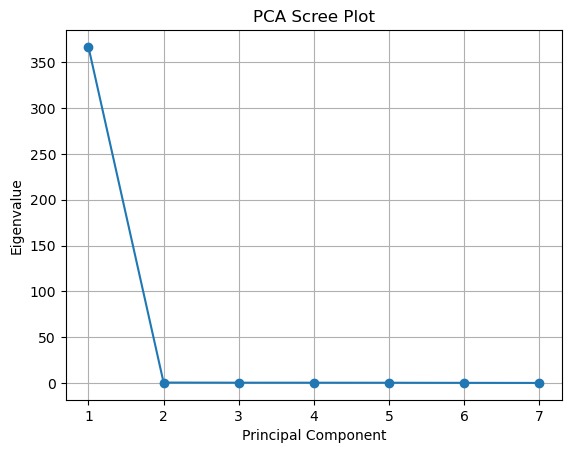

In [71]:
# PCA scree plot:

# Create the scree plot
plt.plot(np.arange(1, len(reduced_transformed_eigenvalues) + 1), reduced_transformed_eigenvalues, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.show()

In [74]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load or generate your data

# Standardize the data (assuming data is stored in the variable data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)

# Check for and handle NaN and infinity values
data_scaled[np.isnan(data_scaled)] = 0
data_scaled[np.isinf(data_scaled)] = 0

# Create the PCA instance
pca = PCA()

# Fit the PCA on the cleaned and scaled data
pca.fit(data_scaled)

# Principal components (eigenvectors)
principal_components = pca.components_
print(principal_components)
print("===================================================")

# Variance proportions associated with the axes (eigenvalues)
explained_variance = pca.explained_variance_
print(explained_variance)
print("===================================================")

# Transform data or perform projection
data_array


[[ 1.86271043e-01 -5.31935012e-02 -3.79366087e-01 -3.03175907e-01
   6.00676743e-01 -6.00676743e-01  7.08109576e-02]
 [-4.89933783e-01  1.04357762e-01  3.20217540e-01  5.01040528e-01
   3.32739383e-01 -3.32739383e-01 -4.17207943e-01]
 [-2.11138245e-01 -8.90609153e-01 -3.25563297e-02  2.36782126e-01
   2.37702834e-02 -2.37702834e-02  3.22459665e-01]
 [-3.50864387e-01  4.00281921e-01  1.29307023e-01  6.96595963e-02
   8.18721291e-02 -8.18721291e-02  8.25645026e-01]
 [-7.32747977e-01  1.70669385e-02 -4.99830700e-01 -3.82038027e-01
  -1.29061442e-01  1.29061442e-01 -1.83552795e-01]
 [ 1.43747042e-01  1.80494735e-01 -6.97087620e-01  6.70948187e-01
  -6.74316389e-02  6.74316389e-02  3.95191955e-02]
 [-9.91098524e-18  1.43741647e-17  7.82550201e-17 -6.91503513e-17
  -7.07106781e-01 -7.07106781e-01 -1.16895438e-17]]
[2.32357581e+00 1.24725674e+00 1.02009614e+00 9.33328606e-01
 8.31358535e-01 6.44936102e-01 1.98272888e-32]


array([[55,  1,  0, ...,  0,  1,  1],
       [80,  1,  0, ...,  0,  1,  0],
       [80,  1,  1, ...,  0,  1,  1],
       ...,
       [30,  0,  0, ...,  1,  0,  0],
       [30,  0,  1, ...,  0,  1,  0],
       [80,  0,  0, ...,  1,  0,  0]], dtype=int64)